In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Question 1
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. exactly 14 recover?

this is P(X=14)

In [3]:
n = 20
p = 0.8
k = 14

# scipy kodlarında x yerine k kullanıldığı için burada da k değişkenini kullandık.

In [4]:
stats.binom.pmf(k, n, p)

0.10909970097304983

b. at least 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

or 1- P(X<10)

In [5]:
k = 9

# k=10 yaparsam (1- kümülatif(X=10) ) dediğimde 10'u da çıkaracağı için elimde 11 --> 20 kalacaktır. 
# ama ben 10-->20 toplamını arıyorum
# bu yüzden k=9 yaptım

In [6]:
stats.binom.cdf(k, n, p) 

# Bu, 10'a kadar olan probabilitylerin toplamı

0.0005634136976601897

In [7]:
1 - stats.binom.cdf(k, n, p)

0.9994365863023398

In [10]:
stats.binom.pmf(k,n,p)

0.000461684932503141

In [11]:
1-stats.binom.pmf(k,n,p)

0.9995383150674969

c. at least 14 but not more than 18 recover?

In [14]:
# önce uzun yoldan yapıyorumthis is P(14≤X≤18)=P(14)+P(15)+...+P(18)

x1 = 14
x2 = 18

In [8]:
stats.binom.pmf(14,n,p)+stats.binom.pmf(15,n,p)+stats.binom.pmf(16,n,p)+stats.binom.pmf(17,n,p)+stats.binom.pmf(18,n,p)

0.8441321961561871

In [15]:
# bunu daha kısa yoldan cmf ile yapalım:

stats.binom.cdf(x2,n,p) - stats.binom.cdf(x1-1,n,p)


0.844132196156189

d. at most 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [16]:
k = 16

# at most dediği için 16'yı dahil olarak kabul edeceğiz.

In [17]:
stats.binom.cdf(k,n,p)

0.5885511380434305

e. Construct discrete probability distribution table and draw a graph

In [13]:
dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))
    print(str(i) + "\t" + str(stats.binom.pmf(i,n,p)))

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


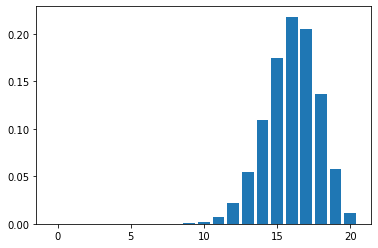

In [14]:
# bunun plotunu çizelim

plt.bar(list(range(n+1)), dist);

## Question 2
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [20]:
mu = 78
sigma = np.sqrt(36)
x = 72

# cmf ile 72'e kadar olan toplamı bulurum sonra 1 den cdf (72) yi çıkartırım.

In [21]:
stats.norm.cdf(x, mu, sigma)

0.15865525393145707

In [22]:
# 72'den fazla olanların olasılığını bulabilmem için 72'ye kadar olanı 1 den çıkartmam lazım.

1 - stats.norm.cdf(x,mu,sigma)

0.8413447460685429

b. Suppose that students scoring in the top 10% of this distribution are to receive an A grade.
What is the minimum score a student must achieve to earn an A grade?

In [23]:
# ilk yüzde 10 notuna A veriliyor. en az kaç alması lazım ki not A gelsin?

# ppf kullanacağım.
# ppf'in cdf'in tersi olduğunu hatırlayalım!

q = 1 - 0.1


In [24]:
stats.norm.ppf(q, mu, sigma)

# 85.68 alırsa notu A gelir.

85.6893093932676

In [25]:
a = stats.norm.ppf(q, mu, sigma)

stats.norm.cdf(a, mu, sigma)

# cdf i kullandığında value'dan (x'ten) olasılığa (p'ye) ulaşıyorsun, 
# ppf i kullandığında kümülatif olasılıktan value'ya (x'e) ulaşıyorsun

0.9000000000000001

In [19]:
stats.norm.cdf(85.7,mu,sigma) 

# cdf'in içine parametre olarak ppf'i koyduk (85.7) ve p ye ulaştık

0.9003123403704779

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [20]:
q = 1 - 0.281
q

0.719

In [21]:
stats.norm.ppf(q,mu,sigma)

# stats.norm.ppf(1-0.28,mu, sigma)

81.47924035456623

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [22]:
q1 = 0.25
x1 = stats.norm.ppf(q1,mu,sigma)
x1

73.95306149882352

In [23]:
1 - stats.norm.cdf(x1+5,mu,sigma)

0.43689605516226615

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

## Question 3
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [24]:
# 90% distribution dediğimiz zaman soldan ve sağdan 0.05'er yüzdeler kalmış demektir.

dof = 15
q = 0.95

In [25]:
stats.t.ppf(q, dof)

# t dağılımı! diğer dağılımlardan tek farklı degrees of freedom (dof) olması. 
# dof,  30'dan fazla ise zaten normal dağılıma giriyor. t deyince dof 30 dan az olmalı.

1.7530503556925547

In [26]:
# t distribution un pdf'ini çizelim:

xs = np.linspace(-5, 5, 1000)
xs

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

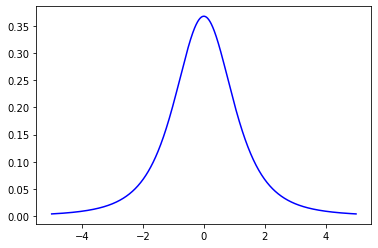

In [27]:
# önce t dağılımının plotunu görelim. 

xs = np.linspace(-5, 5, 1000)

plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df = 3)")

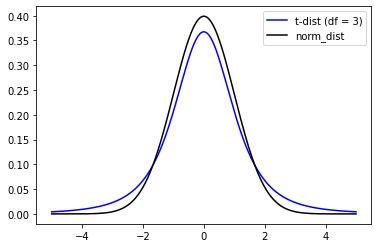

In [29]:
# t dağılımı ile normal dağılımı üst üste bindirip görelim:

xs = np.linspace(-5, 5, 1000)

plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df = 3)")

plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm_dist")

plt.legend()

# t dağılımı daha basık (spread daha fazla), standard deviation daha büyük.

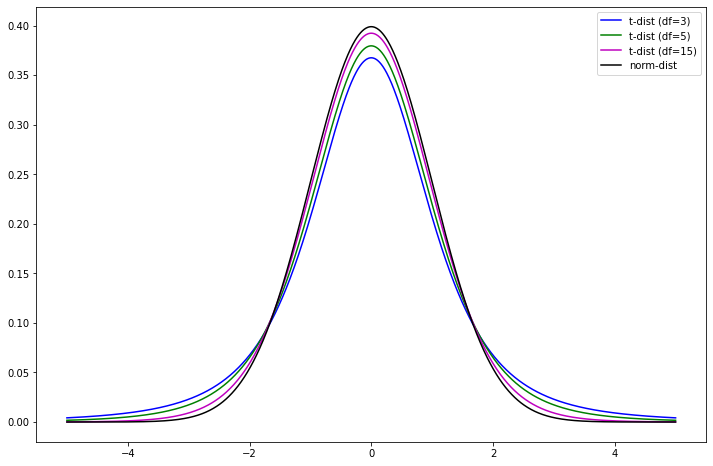

In [30]:
plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend()

# serbestlik derecesi daha yüksek olan t dağılımının normal dağılıma daha yakın olduğunu görebiliyoruz.

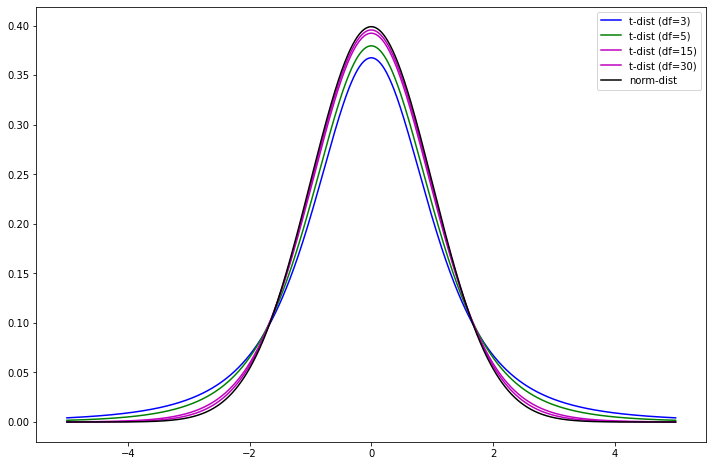

In [31]:

plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.t.pdf(xs,30), "m", label = "t-dist (df=30)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend()

# dof=30 yaptığımızda t dağılımı neredeyse normal dağılımla aynı oldu.

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [27]:
import seaborn as sns

In [28]:
sns.get_dataset_names()

C:\Users\salim\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\salim\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [29]:
tips = 

SyntaxError: invalid syntax (<ipython-input-29-d37be25401a0>, line 1)

2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

3. Subset a dataframe just including Sunday tips

4. Calculate mean and std

5. Calculate standart error of the mean

In [ ]:
sem = 

6. Calculate the margin of error (95%)

In [ ]:
moe = 

7. Calculate the upper confidence limit

8. Calculate the lower confidence limit

9. Calculate 95% Confidence Interval around the mean by using scipy.stats